# Part 1 : Football

### Import nessessory libraries

mplsoccer is a Python library for plotting soccer/football charts in Matplotlib and loading StatsBomb open-data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from IPython.display import Image
import math
#from mplsoccer import Pitch, Sbopen, VerticalPitch

## Preprocessing football data

### Load the data

In [3]:
football_data = pd.read_csv("football.csv")


### Drop duplicated instances

In [4]:
football_data.drop_duplicates(inplace=True)

### Adding new features

We are going to add multiple features to our dataset.
 - **Distance of the shot**: Adding the distance between where the ball shooted and the center of goal. The distance formula using coordinates $(x_1, y_1)$ and $(x_2, y_2)$ is:
 
 
 $ d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2} $
 
 that the $(x_2, y_2)$ is the center of goal coordinates. In our data set it is (0, 0)
 
 - **Angle of the shot**: The second thing to consider when it comes to evaluating a shot is the view the player has of the goal: the more he or she can see, the better your chance of scoring.
 
 
 $tan(a) = \frac{7.32x}{x^2 + y^2 - \left(\frac{7.32}{2}\right)^2}$

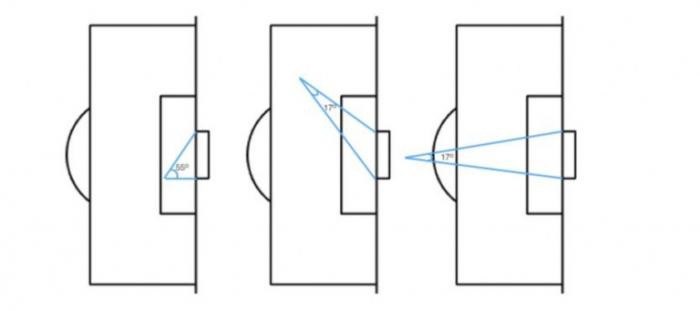

In [8]:
Image(filename = 'images/GoalAngleMultiple.jpg')
#source: https://soccermatics.readthedocs.io/en/latest/lesson2/GeometryOfShooting.html

In [5]:
def distance(x, y):
    return math.sqrt(x**2 + y**2)

def angle(x, y):
    numerator = 7.32 * x
    denominator = x**2 + y**2 - (7.32/2)**2
    a_radians = math.atan(numerator / denominator)
    a_degrees = math.degrees(a_radians)
    return a_degrees

In [6]:
football_data['angle'] = football_data.apply(lambda row: angle(row['x'], row['y']), axis=1)
football_data['distance'] = football_data.apply(lambda row: distance(row['x'], row['y']), axis=1)

In [7]:
football_data.head()

,matchId,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome,angle,distance
0,m_91,p_103,open play,right foot,13.47,-11.22,1,0,medium,70,9,goal,18.544088,17.530810
1,m_17,p_16,open play,left foot,9.48,14.22,3,0,medium,55,4,saved by keeper,13.982592,17.090313
2,m_111,p_88,free kick,left foot,29.43,-1.25,6,2,low,86,31,saved by keeper,14.153255,29.456534
3,m_142,p_87,open play,right foot,26.93,1.00,4,1,medium,77,2,missed chance,15.458384,26.948560
4,m_117,p_9,open play,right foot,10.72,5.24,2,0,medium,76,46,goal,31.315918,11.932141


### Missisng Value

In [8]:
missing_values = football_data.isna().any()
print(missing_values[missing_values].index.tolist())

['interferenceOnShooter', 'outcome']


The two columns 'interferenceOnShooter' and 'outcome' have missing values.

In [9]:
missing_values_outcome = football_data['outcome'].isna().sum()
missing_values_interferenceOnShooter = football_data['interferenceOnShooter'].isna().sum()

# Get the total number of samples with missing values
total_missing_samples = (football_data['outcome'].isna() | football_data['interferenceOnShooter'].isna()).sum()

print("Number of missing values in column outcome:", missing_values_outcome)
print("Number of missing values in column B:", missing_values_interferenceOnShooter)
print("Total number of samples with missing values:", total_missing_samples)

Number of missing values in column outcome: 34
Number of missing values in column B: 34
Total number of samples with missing values: 34


The 0.003 of the samples in our data dataset has missing value so can easily drop them becuase it has not even small effect on the predictions.

In [11]:
football_data.dropna(inplace=True)
print(football_data.shape)

(8891, 14)


### Encoding Categorical variables

We have two approaches for encoding categorical variables.
 - **One-Hot Encoding**:
 - **Assigning numerical values**:

## Preprocessing the data

# 2. Multivariate Regression Implementation

In [2]:
def preprocess_train_test_gradient(X, y, target_name, alpha, iterations):
    X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    X = np.hstack((np.ones((len(y), 1)), X))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=555)
    theta = np.zeros((X_train.shape[1], 1))
    theta, cost_history = gradient_descent(X_train, y_train, theta, alpha, iterations)
    predictions = X_test.dot(theta)
    
    mse = mean_squared_error(y_test, predictions)
    print(f"Mean Squared Error on Test Set for {target_name}:", mse)

    plt.plot(cost_history)
    plt.title(f'Cost History for {target_name}')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.show()
    plt.scatter(y_test, predictions)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.title(f'Actual vs Predicted {target_name} (Test Set)')
    plt.xlabel(f'Actual {target_name}')
    plt.ylabel(f'Predicted {target_name}')
    plt.show()

def compute_cost(X, y, theta):
    m = len(y)
    J = np.sum((X.dot(theta) - y) ** 2) / (2 * m)
    return J

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []
    for _ in range(iterations):
        theta = theta - (alpha / m) * X.T.dot(X.dot(theta) - y)
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
    return theta, cost_history


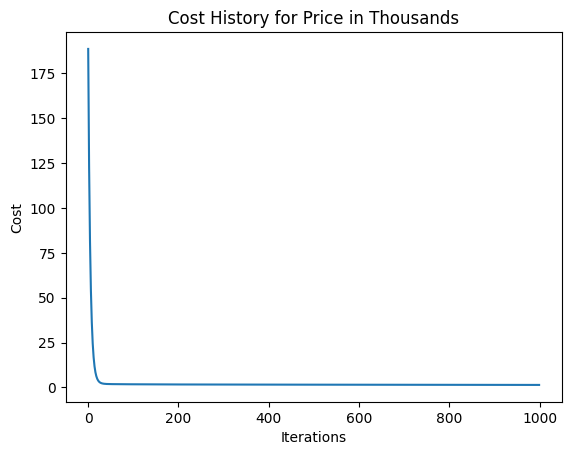

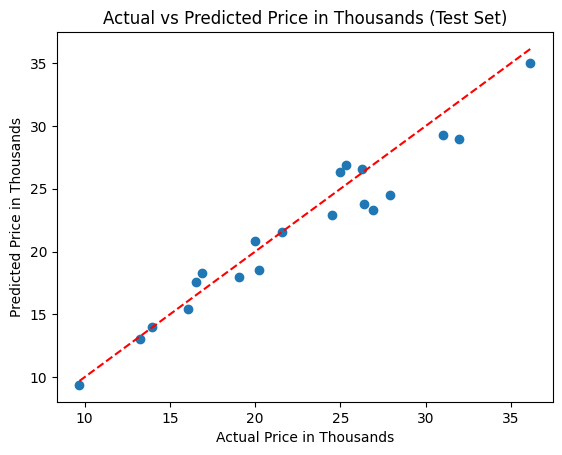

Mean Squared Error on Test Set for Price in Thousands: 3.0035875226166806


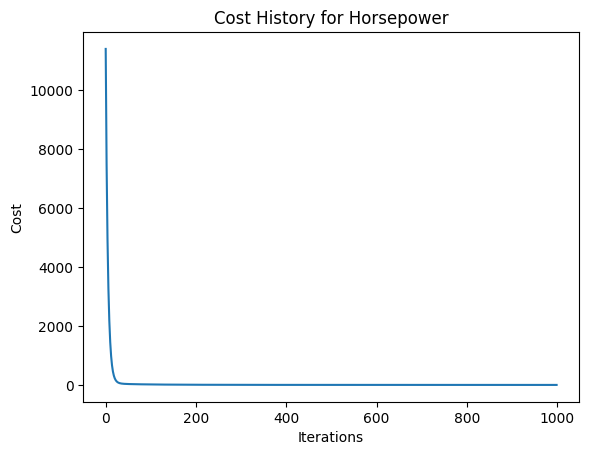

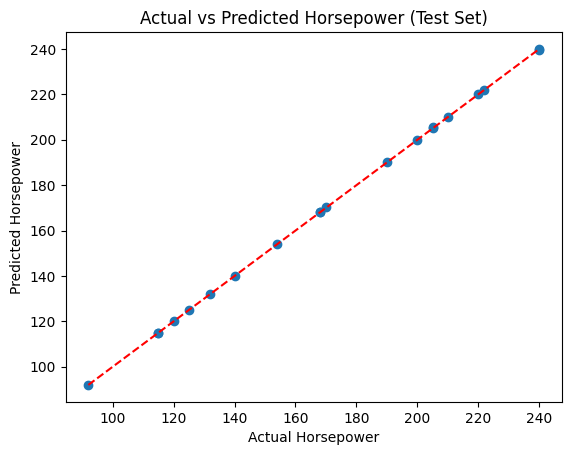

Mean Squared Error on Test Set for Horsepower: 0.03384252741142455


In [3]:
data = pd.read_csv('cars.csv')
data.drop_duplicates(inplace=True)

X_price = data.drop(columns=['Price in Thousands']).values
y_price = data['Price in Thousands'].values.reshape(-1, 1)

X_horsepower = data.drop(columns=['Horsepower']).values
y_horsepower = data['Horsepower'].values.reshape(-1, 1)

preprocess_train_test_gradient(X_price, y_price, 'Price in Thousands', alpha=0.1, iterations=1000)
preprocess_train_test_gradient(X_horsepower, y_horsepower, 'Horsepower', alpha=0.1, iterations=1000)

In [4]:
X = data.drop(columns=['Price in Thousands']).values
y = data['Price in Thousands'].values.reshape(-1, 1)
m = len(y)

X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
X = np.hstack((np.ones((m, 1)), X))


alpha_values = [0.001, 0.005, 0.01, 0.05, 0.1]
mse_values = {}
num_iterations = 100

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

for alpha in alpha_values:
    mse_values[alpha] = 0
    
    for _ in range(num_iterations):
        theta = np.zeros((X_train.shape[1], 1))
        theta, cost_history = gradient_descent(X_train, y_train, theta, alpha, 1000)
        predictions = X_test.dot(theta)
        mse = mean_squared_error(y_test, predictions)
        mse_values[alpha] += mse

best_alpha = min(mse_values, key=lambda k: mse_values[k] / num_iterations)
print("Best Alpha:", best_alpha)
print("Average Mean Squared Error:", mse_values[best_alpha] / num_iterations)


Best Alpha: 0.1
Average Mean Squared Error: 2.4013505826712787


In [5]:
X = data.drop(columns=['Horsepower']).values
y = data['Horsepower'].values.reshape(-1, 1)
m = len(y)

X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
X = np.hstack((np.ones((m, 1)), X))


alpha_values = [0.001, 0.005, 0.01, 0.05, 0.1]
mse_values = {}
num_iterations = 100

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

for alpha in alpha_values:
    mse_values[alpha] = 0
    
    for _ in range(num_iterations):
        theta = np.zeros((X_train.shape[1], 1))
        theta, cost_history = gradient_descent(X_train, y_train, theta, alpha, 1000)
        predictions = X_test.dot(theta)
        mse = mean_squared_error(y_test, predictions)
        mse_values[alpha] += mse

best_alpha = min(mse_values, key=lambda k: mse_values[k] / num_iterations)
print("Best Alpha:", best_alpha)
print("Average Mean Squared Error:", mse_values[best_alpha] / num_iterations)


Best Alpha: 0.1
Average Mean Squared Error: 0.13545538069564286


# 4. Comparison with Built-in Python Libraries

Mean Squared Error for Price in Thousands: 3.2355458952646595e-15
R-squared for Price in Thousands: 0.9999999999999999


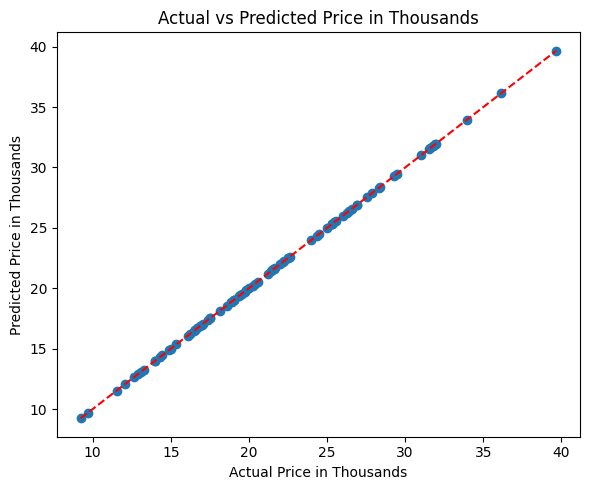

Mean Squared Error for Horsepower: 3.8486773308472655e-15
R-squared for Horsepower: 1.0


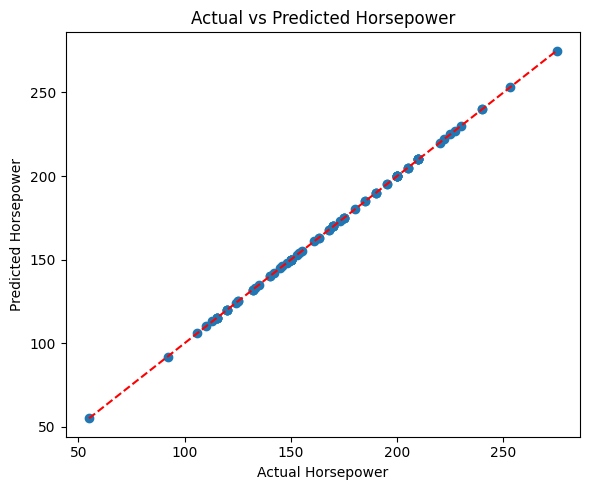

In [6]:
def perform_regression_and_visualization(feature_name):
    data = pd.read_csv('cars.csv')

    X = data.drop(columns=[feature_name]) 
    y = data[feature_name] 

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.87, random_state=555)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r_squared = model.score(X_test, y_test)

    print("Mean Squared Error for {}: {}".format(feature_name, mse))
    print("R-squared for {}: {}".format(feature_name, r_squared))

    plt.figure(figsize=(6, 5))

    plt.scatter(y_test, y_pred)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.title('Actual vs Predicted {}'.format(feature_name))
    plt.xlabel('Actual {}'.format(feature_name))
    plt.ylabel('Predicted {}'.format(feature_name))

    plt.tight_layout()
    plt.show()

perform_regression_and_visualization("Price in Thousands")
perform_regression_and_visualization("Horsepower")
